In [389]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import numpy as np
from sklearn.ensemble import IsolationForest

In [390]:
clinical_attributes = pd.read_csv('step_02/clinical_attributes.csv')
mutation = pd.read_csv('step_02/mutation.csv')
z_score = pd.read_csv('step_02/z_score.csv')
response = pd.read_csv('step_02/response.csv')

In [391]:
print(f"{clinical_attributes.shape}\n{mutation.shape}\n{z_score.shape}\n{response.shape}")

(1677, 28)
(1677, 175)
(1677, 490)
(1677, 2)


## Deteccion de outliers

### Mutation

In [392]:
mutation = pd.merge(mutation, response, on='patient_id')
mutation

,patient_id,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,...,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut,mut_count,overall_survival
0,2,no_mutation,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,2,1
1,5,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,2,0
2,6,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,1,1
3,8,no_mutation,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,2,0
4,10,missense,frameshift,no_mutation,no_mutation,no_mutation,no_mutation,missense,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,7295,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,missense,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,4,1
1673,7296,no_mutation,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,6,0
1674,7297,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,4,0
1675,7298,no_mutation,no_mutation,no_mutation,missense,no_mutation,no_mutation,frameshift,no_mutation,missense,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,15,0


In [393]:
mutation_types = ['no_mutation', 'missense', 'frameshift', 
                       'deletion', 'mixed', 'delins', 'insertion']
for t in mutation_types:
    mutation[t] = mutation.apply(lambda row: (row == t).sum(), axis=1)
mutation

,patient_id,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,...,siah1_mut,mut_count,overall_survival,no_mutation,missense,frameshift,deletion,mixed,delins,insertion
0,2,no_mutation,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,2,1,171,1,1,0,0,0,0
1,5,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,2,0,171,2,0,0,0,0,0
2,6,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,1,1,172,1,0,0,0,0,0
3,8,no_mutation,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,2,0,171,2,0,0,0,0,0
4,10,missense,frameshift,no_mutation,no_mutation,no_mutation,no_mutation,missense,no_mutation,no_mutation,...,no_mutation,4,0,169,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,7295,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,missense,no_mutation,...,no_mutation,4,1,169,4,0,0,0,0,0
1673,7296,no_mutation,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,6,0,168,4,0,1,0,0,0
1674,7297,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,4,0,169,3,0,1,0,0,0
1675,7298,no_mutation,no_mutation,no_mutation,missense,no_mutation,no_mutation,frameshift,no_mutation,missense,...,no_mutation,15,0,160,12,1,0,0,0,0


In [394]:
melted_df = mutation[mutation_types + ['patient_id', 'overall_survival']]
melted_df = pd.melt(melted_df, id_vars=['patient_id', 'overall_survival'], value_vars=mutation_types, var_name='mutation_type', value_name='mut_count')
melted_df

,patient_id,overall_survival,mutation_type,mut_count
0,2,1,no_mutation,171
1,5,0,no_mutation,171
2,6,1,no_mutation,172
3,8,0,no_mutation,171
4,10,0,no_mutation,169
...,...,...,...,...
11734,7295,1,insertion,0
11735,7296,0,insertion,0
11736,7297,0,insertion,0
11737,7298,0,insertion,0


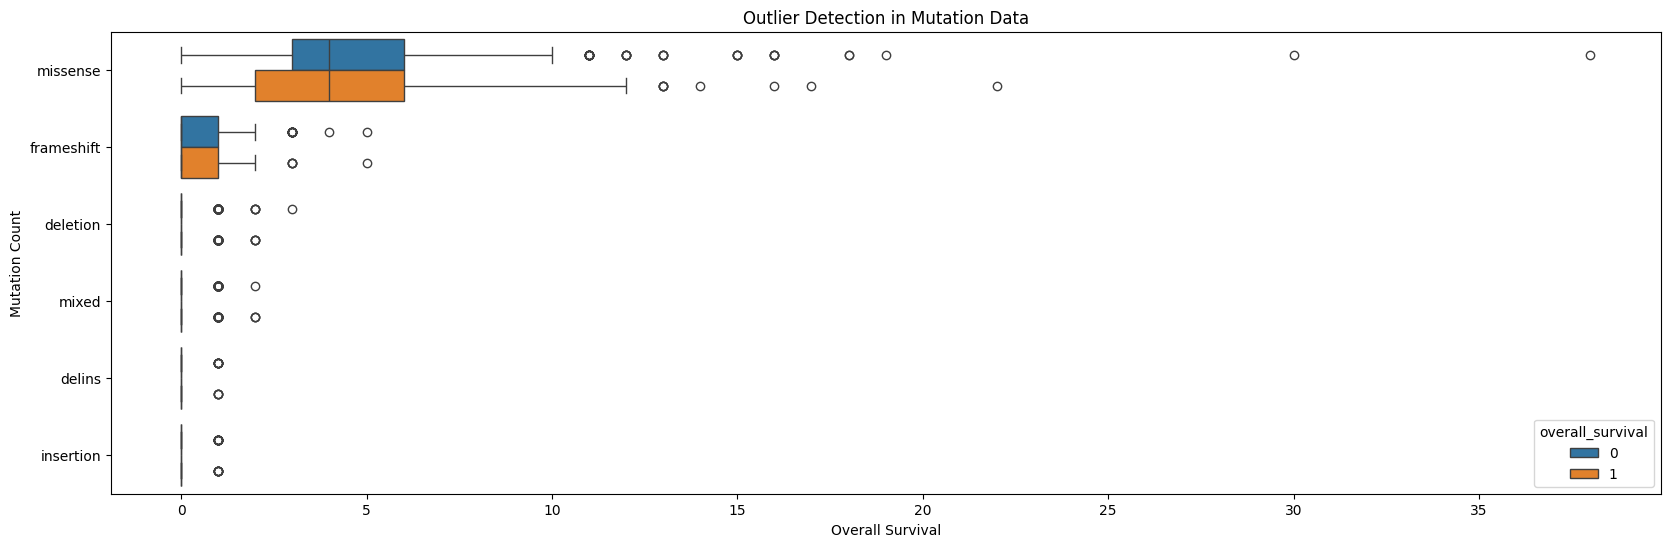

In [395]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=melted_df[melted_df["mutation_type"] != "no_mutation"], y='mutation_type', x='mut_count', hue='overall_survival')
plt.xlabel('Overall Survival')
plt.ylabel('Mutation Count')
plt.title('Outlier Detection in Mutation Data')
plt.show()


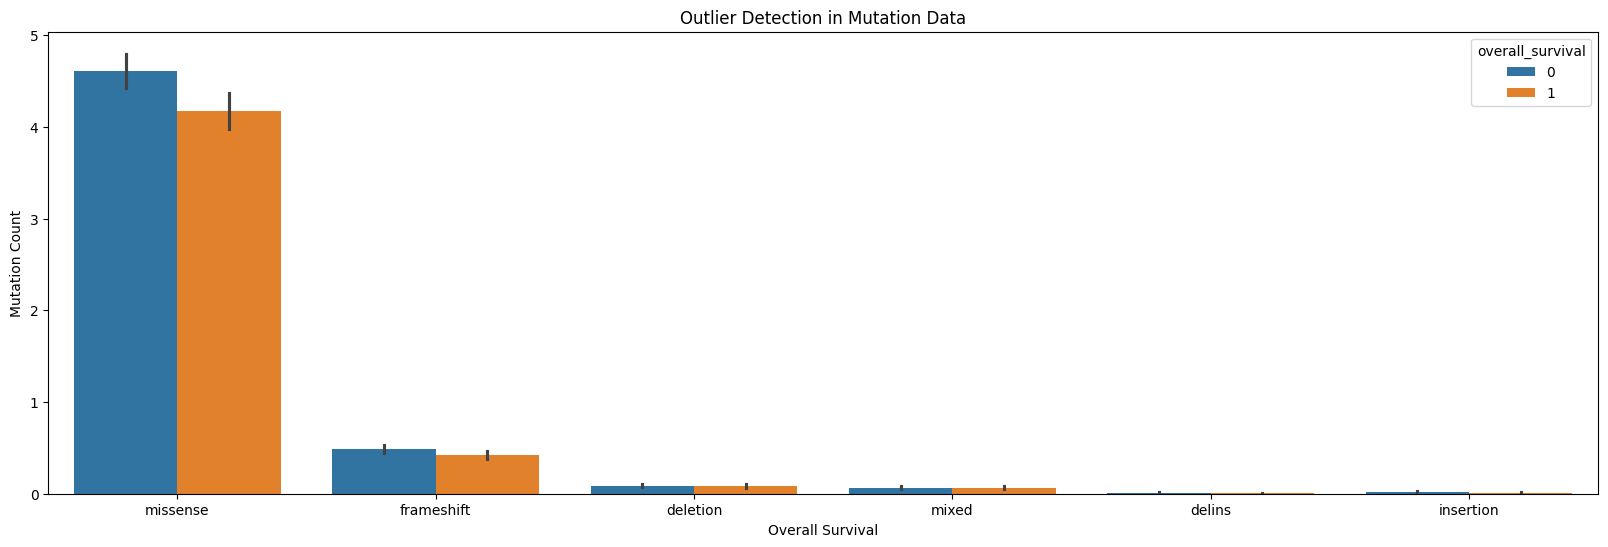

In [396]:
plt.figure(figsize=(20, 6))
sns.barplot(data=melted_df[melted_df["mutation_type"] != "no_mutation"], x='mutation_type', y='mut_count', hue='overall_survival')
plt.xlabel('Overall Survival')
plt.ylabel('Mutation Count')
plt.title('Outlier Detection in Mutation Data')
plt.show()

Creo que no llego a nada con todo esto...
Hay outliers pero quizas no es el metodo adecuado de obtenerlo, ni tampoco adecuado sacar estos datos

### Z-Score
Confio en que esta estandarizado y sin outliers :)

### Clinical Attributes

In [397]:
clinical_attributes['overall_survival'] = response['overall_survival']
clinical_attributes

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,overall_survival
0,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0.0,2.0,4.020,IDC,Positive,1,ER+/HER2- High Prolif,10.0,1.0,1
1,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,1.0,2.0,4.030,IDC,Positive,0,ER+/HER2- High Prolif,15.0,2.0,0
2,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,3.0,1.0,4.050,MDLC,Positive,1,ER+/HER2- High Prolif,25.0,2.0,1
3,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,8.0,2.0,6.080,MDLC,Positive,1,ER+/HER2- High Prolif,40.0,2.0,0
4,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,0.0,4.0,4.062,IDC,Positive,1,ER+/HER2- High Prolif,31.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,1.0,4.0,5.050,ILC,Positive,1,ER+/HER2- Low Prolif,25.0,2.0,1
1673,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,1.0,6.0,5.040,IDC,Negative,1,ER+/HER2- High Prolif,20.0,2.0,0
1674,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,45.0,4.0,6.050,IDC,Positive,1,ER+/HER2- High Prolif,25.0,2.0,0
1675,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,12.0,15.0,5.050,IDC,Positive,0,ER+/HER2- High Prolif,25.0,2.0,0


In [398]:
number_columns = []
for col in clinical_attributes.columns:
    if str(clinical_attributes[col].dtype) == "object":
        continue
    if len(clinical_attributes[col].unique()) < 5:
        continue
    number_columns.append(col)

number_columns

['patient_id',
 'age_at_diagnosis',
 'cohort',
 'lymph_nodes_examined_positive',
 'mutation_count',
 'nottingham_prognostic_index',
 'tumor_size']

In [399]:
clinical_attributes[number_columns]

,patient_id,age_at_diagnosis,cohort,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,tumor_size
0,2,43.19,1.0,0.0,2.0,4.020,10.0
1,5,48.87,1.0,1.0,2.0,4.030,15.0
2,6,47.68,1.0,3.0,1.0,4.050,25.0
3,8,76.97,1.0,8.0,2.0,6.080,40.0
4,10,78.77,1.0,0.0,4.0,4.062,31.0
...,...,...,...,...,...,...,...
1672,7295,43.10,4.0,1.0,4.0,5.050,25.0
1673,7296,42.88,4.0,1.0,6.0,5.040,20.0
1674,7297,62.90,4.0,45.0,4.0,6.050,25.0
1675,7298,61.16,4.0,12.0,15.0,5.050,25.0


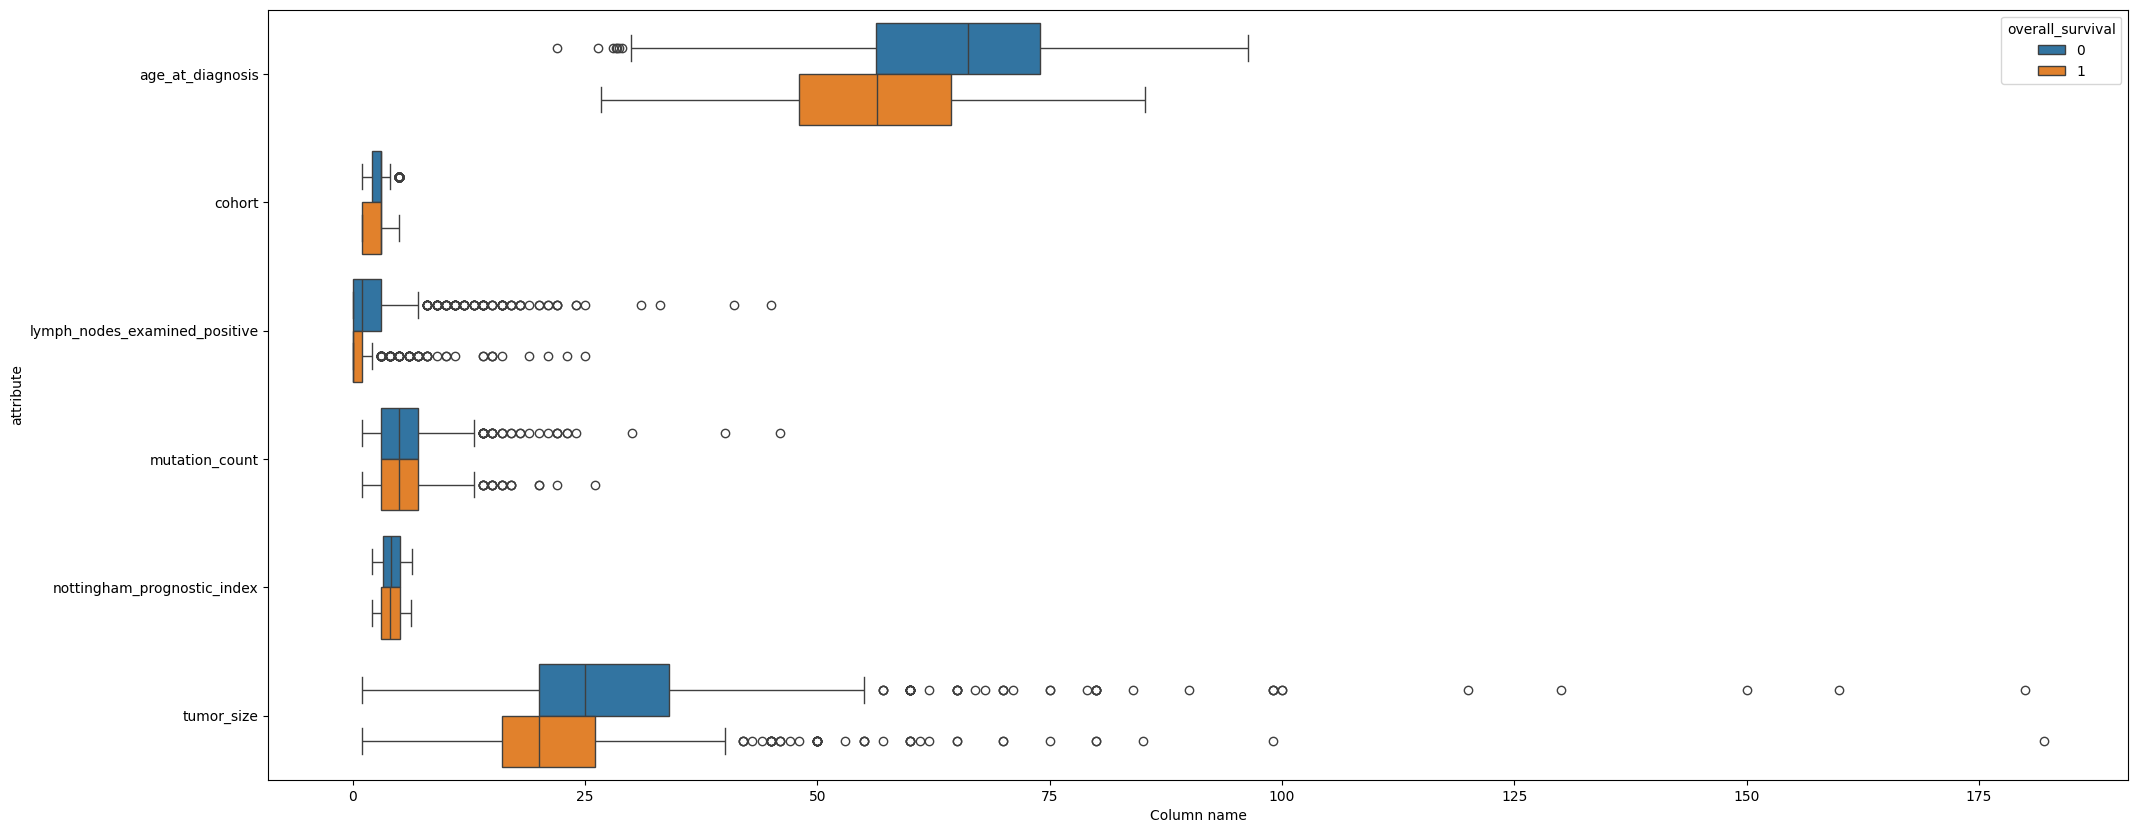

In [400]:
tmp_df = pd.melt(clinical_attributes[number_columns[1:]].assign(
    overall_survival=clinical_attributes['overall_survival']), 
    id_vars='overall_survival', 
    var_name='attribute', 
    value_name='value')
plt.figure(figsize=(24, 10))
sns.boxplot(data=tmp_df, x='value', y='attribute', hue='overall_survival', orient='h')
plt.xlabel('Column name')
plt.show()

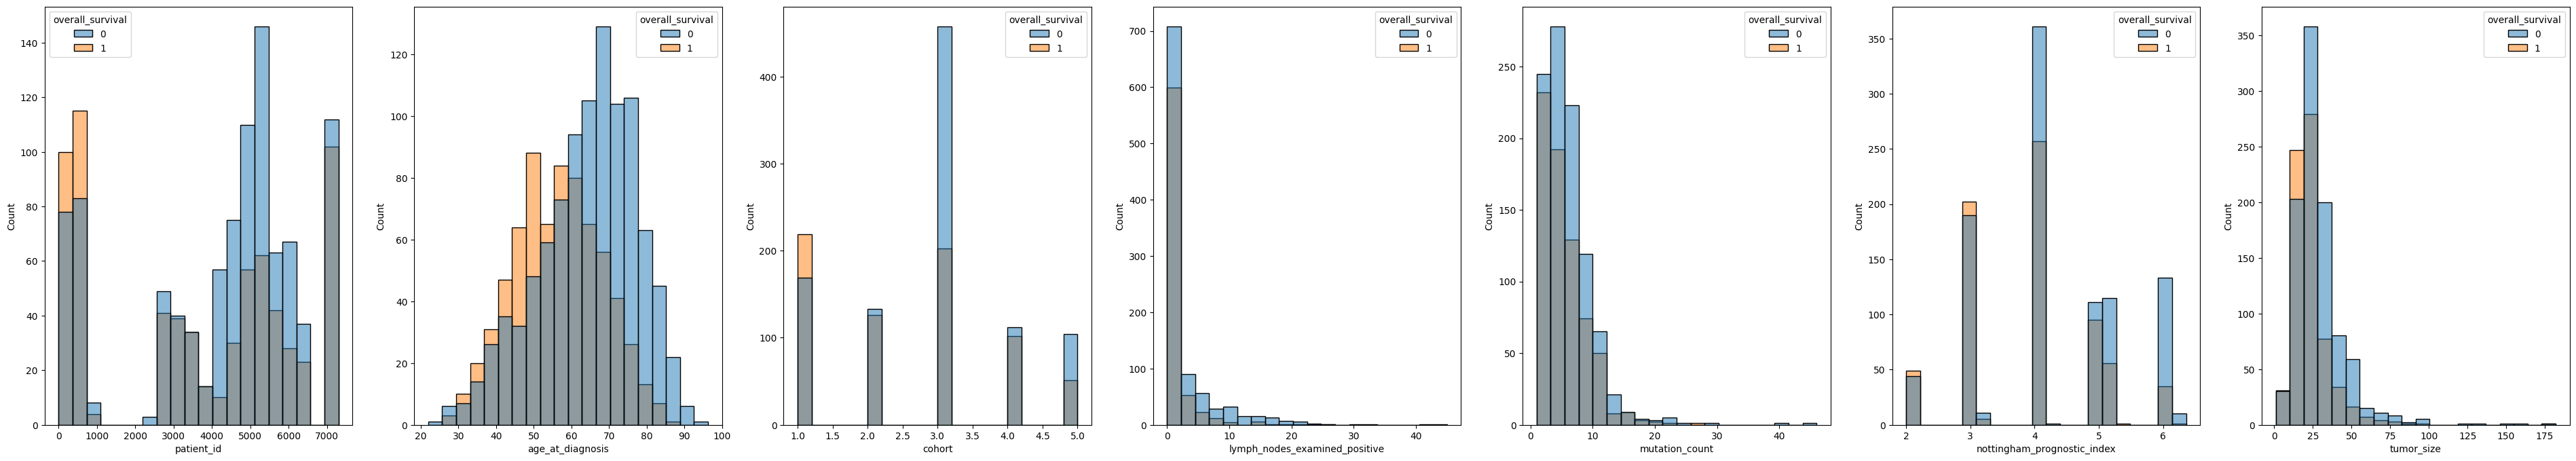

In [401]:
axes, fig = plt.subplots(1, len(number_columns), figsize=(48, 8))
for i, col in enumerate(number_columns):
    sns.histplot(data=clinical_attributes, x=col, hue='overall_survival', bins=20, ax=fig[i])
    fig[i].set_xlabel(col)
plt.show()

In [402]:
# TODO añadir al pipeline
clf = IsolationForest(random_state=42)
clf.fit(clinical_attributes[number_columns])
clinical_attributes['is_outlier'] = clf.predict(clinical_attributes[number_columns])
clinical_attributes[clinical_attributes['is_outlier'] == -1]

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mutation_count,nottingham_prognostic_index,oncotree_code,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,overall_survival,is_outlier
3,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,2.0,6.080,MDLC,Positive,1,ER+/HER2- High Prolif,40.0,2.0,0,-1
6,22,89.08,BREAST CONSERVING,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,0,claudin-low,1.0,Positve,...,1.0,4.058,MDLC,Negative,1,ER+/HER2- High Prolif,29.0,2.0,0,-1
7,28,86.41,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,4.0,5.032,IDC,Negative,1,ER+/HER2- High Prolif,16.0,2.0,0,-1
8,35,84.22,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,Her2,1.0,Negative,...,5.0,3.056,ILC,Negative,0,ER+/HER2- High Prolif,28.0,2.0,0,-1
9,36,85.49,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumA,1.0,Positve,...,1.0,3.044,IDC,Positive,1,ER+/HER2- Low Prolif,22.0,4.0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,7288,55.70,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,2.0,5.060,IDC,Negative,1,ER+/HER2- High Prolif,30.0,2.0,0,-1
1667,7289,51.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,Normal,4.0,Positve,...,5.0,5.130,IDC,Positive,0,ER+/HER2- Low Prolif,65.0,2.0,0,-1
1668,7291,53.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,claudin-low,4.0,Positve,...,4.0,6.100,IDC,Negative,0,HER2+,50.0,2.0,0,-1
1674,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,4.0,6.050,IDC,Positive,1,ER+/HER2- High Prolif,25.0,2.0,0,-1


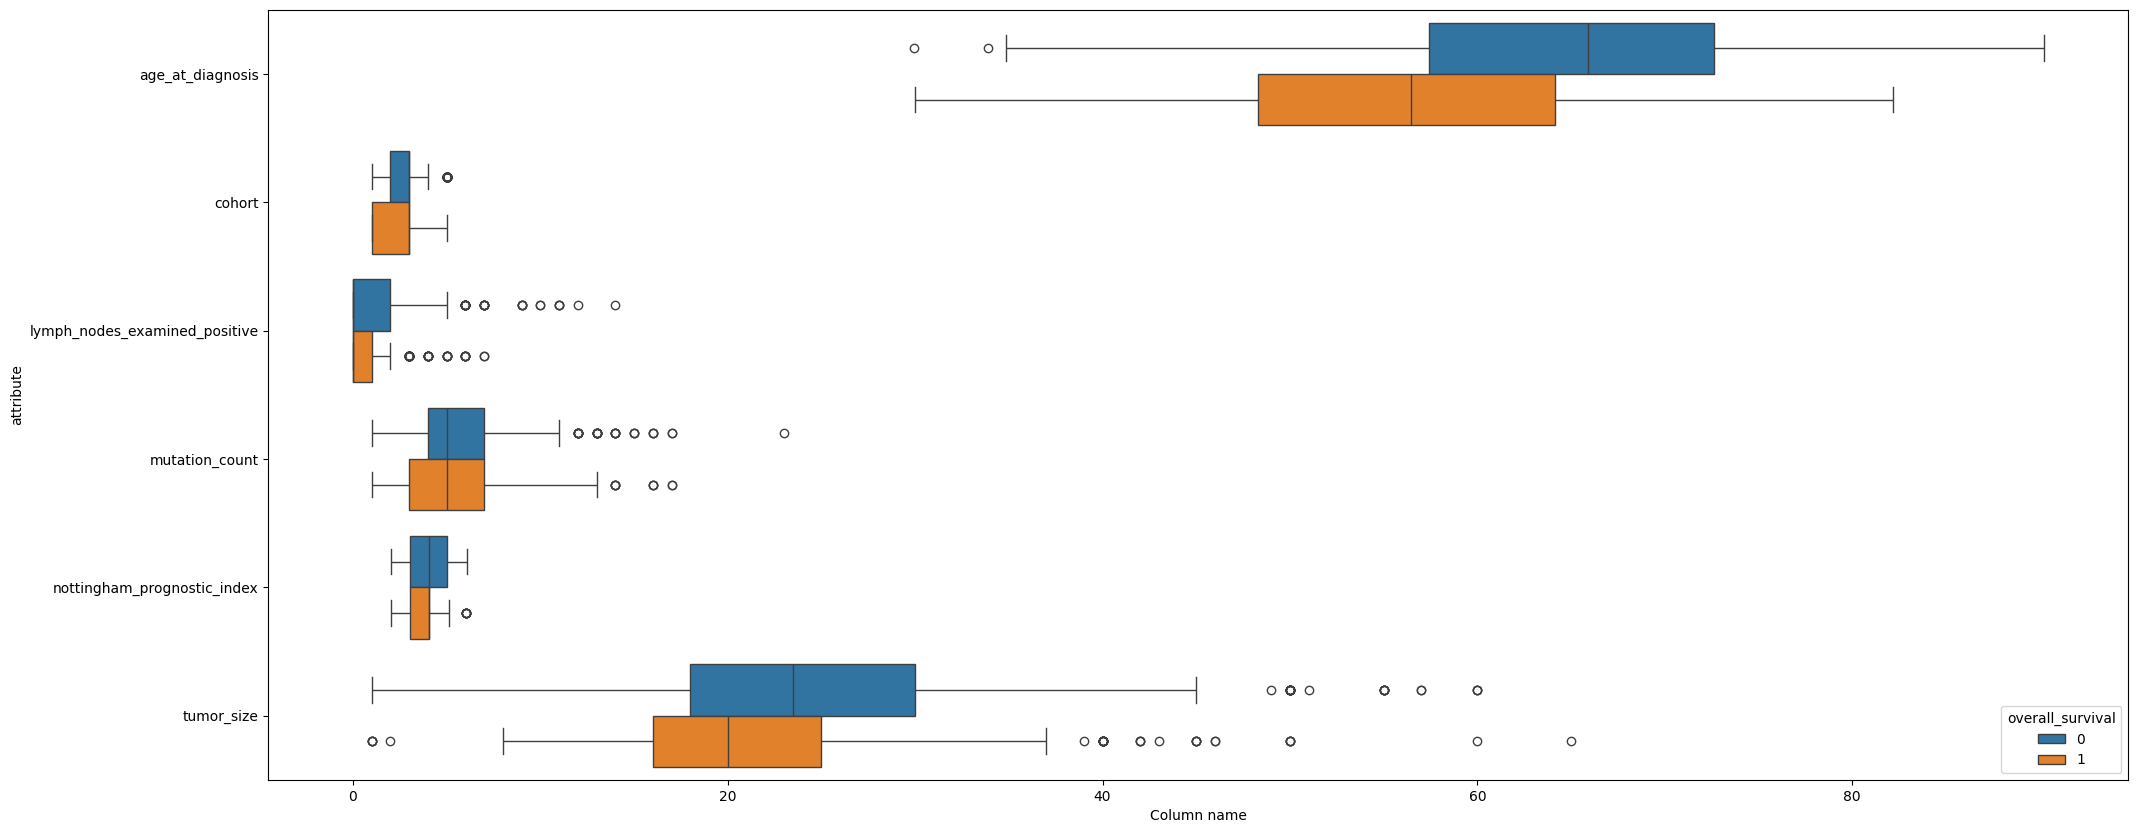

In [403]:
tmp_df = clinical_attributes[clinical_attributes['is_outlier'] == 1]
tmp_df = pd.melt(tmp_df[number_columns[1:]].assign(
    overall_survival=tmp_df['overall_survival']), 
    id_vars='overall_survival', 
    var_name='attribute', 
    value_name='value')
plt.figure(figsize=(24, 10))
sns.boxplot(data=tmp_df, x='value', y='attribute', hue='overall_survival', orient='h')
plt.xlabel('Column name')
plt.show()

In [404]:
tmp_df = clinical_attributes[clinical_attributes['is_outlier'] == 1]

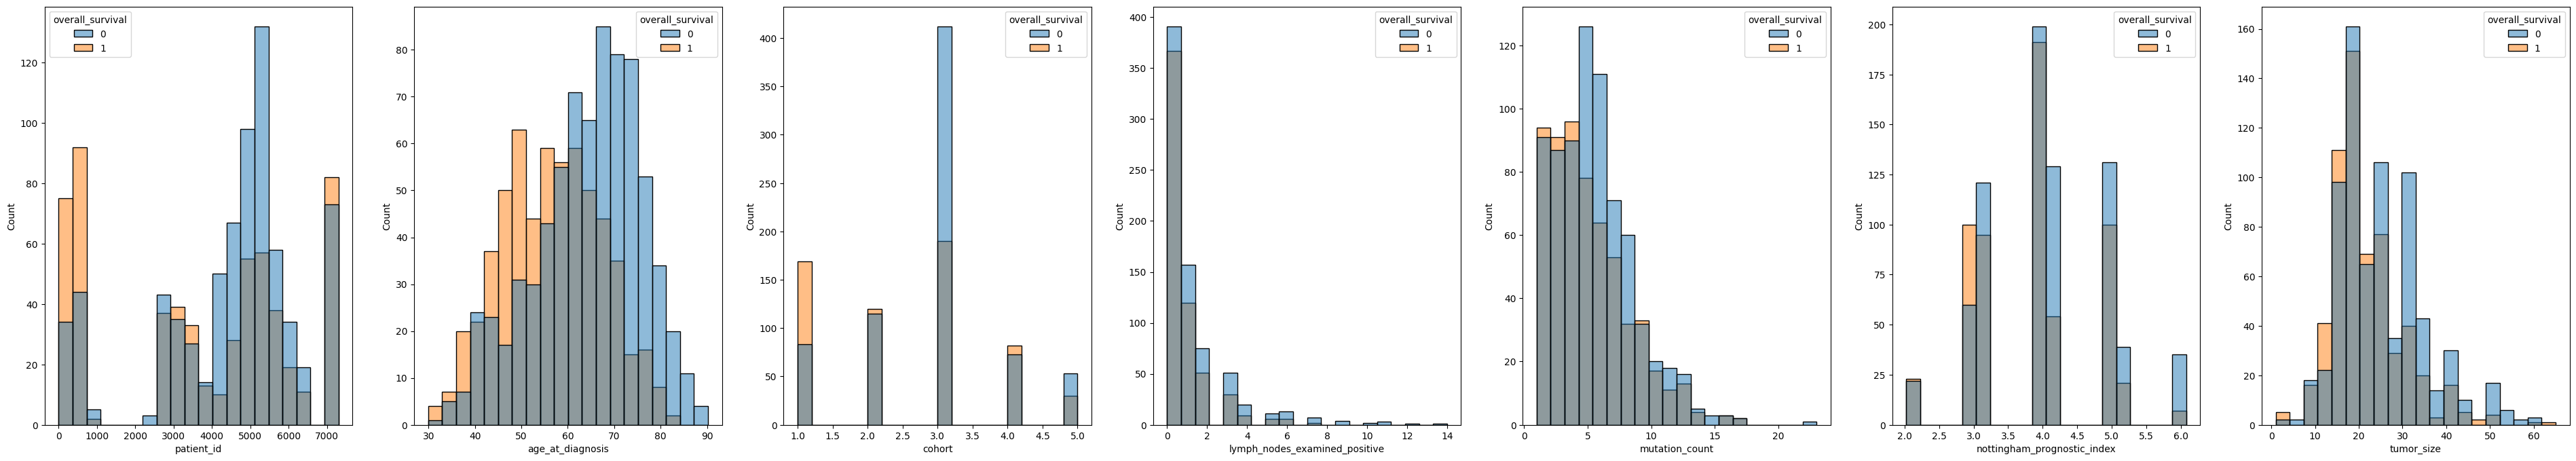

In [405]:
axes, fig = plt.subplots(1, len(number_columns), figsize=(48, 8))
for i, col in enumerate(number_columns):
    sns.histplot(data=tmp_df[number_columns + ['overall_survival']], x=col, hue='overall_survival', bins=20, ax=fig[i])
    fig[i].set_xlabel(col)
plt.show()

### Save

In [406]:
clinical_attributes = clinical_attributes[clinical_attributes['is_outlier'] == 1]
clinical_attributes = clinical_attributes.drop(columns=['is_outlier', 'overall_survival']).reset_index(drop=True)
clinical_attributes

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage
0,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,Right,0.0,2.0,4.020,IDC,Positive,1,ER+/HER2- High Prolif,10.0,1.0
1,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,Right,1.0,2.0,4.030,IDC,Positive,0,ER+/HER2- High Prolif,15.0,2.0
2,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,Right,3.0,1.0,4.050,MDLC,Positive,1,ER+/HER2- High Prolif,25.0,2.0
3,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,Left,0.0,4.0,4.062,IDC,Positive,1,ER+/HER2- High Prolif,31.0,4.0
4,14,56.45,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,1,LumB,1.0,Positve,...,Right,1.0,4.0,4.020,IDC,Positive,1,ER+/HER2- High Prolif,10.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,7293,56.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4.0,Positve,...,Left,1.0,5.0,5.090,IDC,Positive,0,ER+/HER2- Low Prolif,45.0,2.0
1323,7294,59.20,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,Left,1.0,2.0,4.030,IDC,Positive,0,ER+/HER2- High Prolif,15.0,2.0
1324,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,Right,1.0,4.0,5.050,ILC,Positive,1,ER+/HER2- Low Prolif,25.0,2.0
1325,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,Left,1.0,6.0,5.040,IDC,Negative,1,ER+/HER2- High Prolif,20.0,2.0


In [407]:
mutation = mutation.drop(columns=['no_mutation', 'missense', 'frameshift', 'deletion', 'mixed', 'delins', 'insertion', 'overall_survival'], errors='ignore')
mutation

,patient_id,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,...,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut,mut_count
0,2,no_mutation,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,2
1,5,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,2
2,6,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,1
3,8,no_mutation,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,2
4,10,missense,frameshift,no_mutation,no_mutation,no_mutation,no_mutation,missense,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,7295,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,missense,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,4
1673,7296,no_mutation,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,6
1674,7297,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,4
1675,7298,no_mutation,no_mutation,no_mutation,missense,no_mutation,no_mutation,frameshift,no_mutation,missense,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,15


In [408]:
mutation = pd.merge(mutation, clinical_attributes['patient_id'], on='patient_id', how='inner')
mutation

,patient_id,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,...,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut,mut_count
0,2,no_mutation,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,2
1,5,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,2
2,6,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,1
3,10,missense,frameshift,no_mutation,no_mutation,no_mutation,no_mutation,missense,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,4
4,14,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,7293,missense,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,5
1323,7294,no_mutation,splice,no_mutation,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,2
1324,7295,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,missense,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,4
1325,7296,no_mutation,missense,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,...,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,no_mutation,6


In [409]:
z_score = pd.merge(z_score, clinical_attributes['patient_id'], on='patient_id', how='inner')
z_score

,patient_id,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,2,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
1,5,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
2,6,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
3,10,-0.4341,0.6931,0.6909,1.0840,-1.9371,0.9252,1.1520,0.7951,-0.9677,...,-0.3910,0.0395,0.8191,0.1977,-0.2302,-0.5092,-0.3021,0.9357,-0.4217,0.5340
4,14,0.2671,0.4129,-1.3333,0.7834,-0.5109,0.8859,-0.2009,1.0128,-0.0697,...,-1.3151,0.0917,1.6814,2.2495,-1.6522,-3.4775,-0.4892,1.1938,-0.1027,0.4331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,7293,-1.0694,-0.1392,0.7629,0.2124,-1.0129,0.1732,0.4767,0.0841,-0.7502,...,-0.6217,-0.1064,0.5544,-0.1777,1.4395,-1.7915,-0.2462,-0.2934,0.1854,-0.6448
1323,7294,0.9244,-0.8580,-0.6622,1.4311,-1.3367,-0.0613,0.3168,0.9005,-1.5454,...,-0.0160,0.8212,0.2662,2.8345,-0.4319,-1.4772,-1.4477,-0.1200,-0.6573,-0.5130
1324,7295,0.1563,0.5543,-0.6149,0.4572,1.3822,-0.0537,-0.1323,0.2837,-0.0726,...,0.7859,1.5304,1.1196,0.8116,0.0958,-1.2644,-0.3566,-0.2615,-0.6371,-0.5540
1325,7296,0.1343,0.9128,1.3017,0.7383,0.1841,0.0028,0.1243,2.2040,-0.6190,...,-0.5294,-0.6610,-0.1610,0.2251,0.5127,-0.3412,-1.0703,-0.6950,0.0641,-0.8863


In [410]:
response = pd.merge(response, clinical_attributes['patient_id'], on='patient_id', how='inner')
response

,patient_id,overall_survival
0,2,1
1,5,0
2,6,1
3,10,0
4,14,1
...,...,...
1322,7293,1
1323,7294,0
1324,7295,1
1325,7296,0


# Balanceo

In [411]:
counts = response["overall_survival"].value_counts()
print(f"{counts[0]/counts.sum() * 100:.2f}% of the data is 0\n {counts[1]/counts.sum() * 100:.2f}% of the data is 1")

55.46% of the data is 0
 44.54% of the data is 1


In [412]:
min_class_size = response["overall_survival"].value_counts().min()

selected_indexes = []
for classes in response["overall_survival"].unique():
    selected_indexes.append(response[response["overall_survival"] == classes].sample(min_class_size, random_state=42).index)
selected_indexes = np.concatenate(selected_indexes)
selected_indexes.sort()

In [413]:
response = response.loc[selected_indexes].reset_index(drop=True)
mutation = mutation.loc[selected_indexes].reset_index(drop=True)
z_score = z_score.loc[selected_indexes].reset_index(drop=True)
clinical_attributes = clinical_attributes.loc[selected_indexes].reset_index(drop=True)

In [414]:
counts = response["overall_survival"].value_counts()
print(f"{counts[0]/counts.sum() * 100:.2f}% of the data is 0\n {counts[1]/counts.sum() * 100:.2f}% of the data is 1")

50.00% of the data is 0
 50.00% of the data is 1


In [415]:
clinical_attributes.to_csv('step_03/clinical_attributes.csv', index=False)
mutation.to_csv('step_03/mutation.csv', index=False)
z_score.to_csv('step_03/z_score.csv', index=False)
response.to_csv('step_03/response.csv', index=False)